<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://wallpapercosmos.com/w/full/3/d/d/1254787-3840x2160-desktop-4k-mastercard-wallpaper.jpg)"><b><span style='color:black'>Kidney stone classification </span></b> </div>

<br>

![](https://atlanticurologyclinics.com/wp-content/uploads/2022/12/Prevent-Kidney-Stones.jpg)

<br>

### <b><span style='color:#16C2D5'>|</span> Dataset information</b>
"Kidney Stone" dataset can be used to predict the presence of kidney stones based on urine analysis.The 79 urine specimens, were analyzed in an effort to determine if certain physical characteristics of the urine might be related to the formation of calcium oxalate crystals.

### <b><span style='color:#16C2D5'>|</span> Data features</b>

1. `Gravity` : Urine density relative to water, which indicates the concentration of dissolved substances.

2. `pH` : A scale ranging from 1 to 14 that measures the acidity or alkalinity of an aqueous solution; 7 being neutral.

3. `Osmo` : Osmolality, the concentration of osmoles (particles that contribute to osmotic pressure) in a solution, expressed as milliosmoles per liter (mOsm/L) in biological systems.

4. `Cond` : Electrical conductivity, a measure of a liquid's ability to conduct electricity, which depends on the number of ions per unit volume and their drift velocity.

5. `Urea` : Urea concentration in the urine, measured in millimoles per liter (mmol/L).

6. `Calc` : Calcium concentration in the urine, measured in millimoles per liter (mmol/L).

7. `Target` : The presence (True/False) of a kidney stone based on the analysis of the above urine parameters.

### Column Explanations:



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings("ignore")

Read dataset from csv file

In [6]:
# Load the dataset
df = pd.read_csv('./kindey-stone-urine-analysis.csv')

# Exploratory Data Analysis (EDA)

In [9]:
def get_data_char(df):
    data_columns = df.columns

    data_char_df = pd.DataFrame(df.dtypes, columns = ["d_type"])
    data_char_df["#_missing"] = df.isna().sum()
    data_char_df["%_missing"] = df.isna().sum() * 100 / df.shape[0]
    data_char_df["#_unique"] = df.nunique()
    data_char_df["%_unique"] = df.nunique() * 100 / df.shape[0]
    data_char_df["most_frequent"] = df.mode().loc[0]
    
    def get_stats_stats(df):
        return df.aggregate([min, max, "mean", "median", "std"]).T
    
    data_char_df = pd.concat([data_char_df,get_stats_stats(df), df.loc[:2,].T], axis = 1)    
    
    return data_char_df
display(get_data_char(df).style.background_gradient(
    subset = ["%_unique", "std", "median", "mean", "max"
              , "min", "%_missing"],
    cmap = "Oranges"))

**Insights:**

1. We have 6 independent variable, all of which are continous in nature, one identification variable (id) and one binary target variable.
2. The dataset has no missing values.
3. The target varible has a mean < 0.5 and median of 0, indicating that the number of positive class (+1) examples are less than that of number of negative class examples (0)
4. The scales of the features vary a lot, the mean and std of gravity and osmo are on different scales (ones, hundreds). Scaling/Normalizing them is important.
5. The maximum and minimum values in the osmo, urea features vary a lot. Outliers may be present.

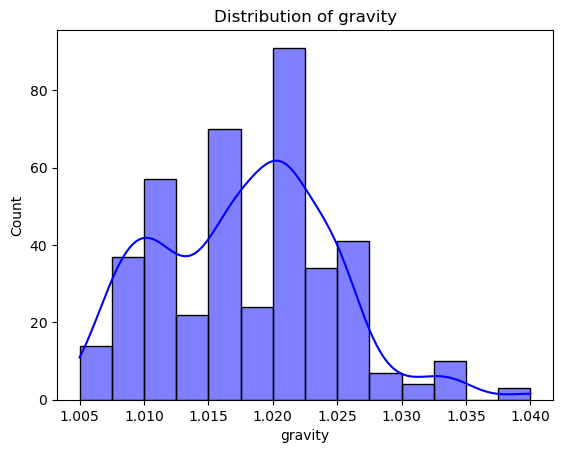

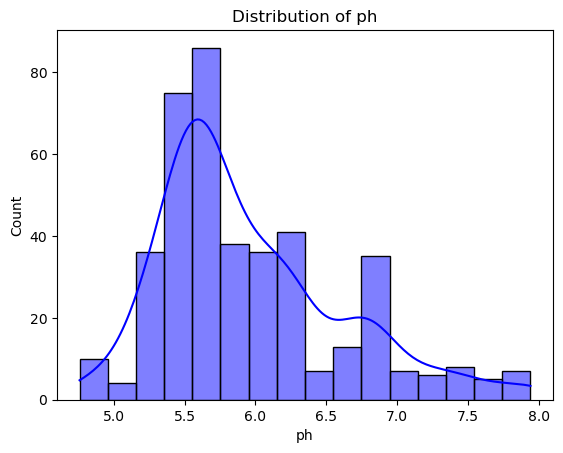

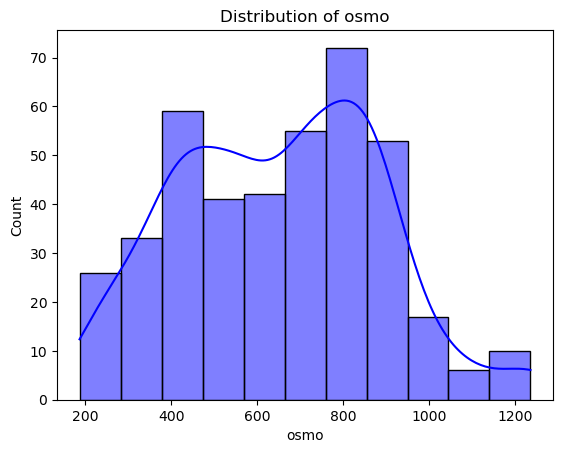

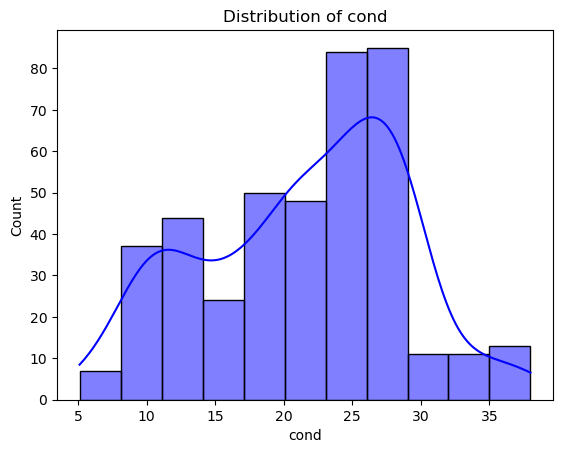

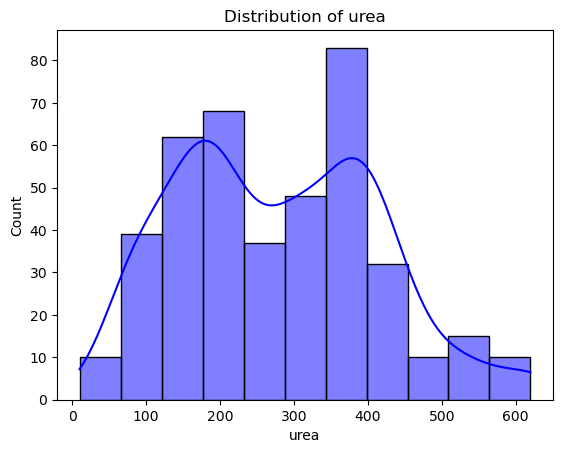

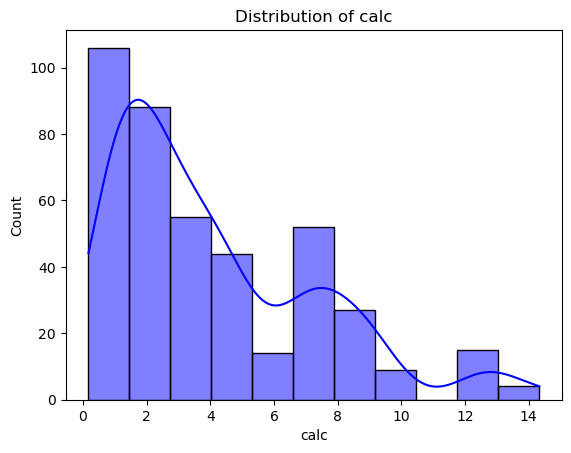

In [ ]:
data_without_target = df.drop(columns=['target'])

# Distribution plots
for column in data_without_target.columns:
    plt.figure()
    sns.histplot(data=data_without_target, x=column, kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.show()

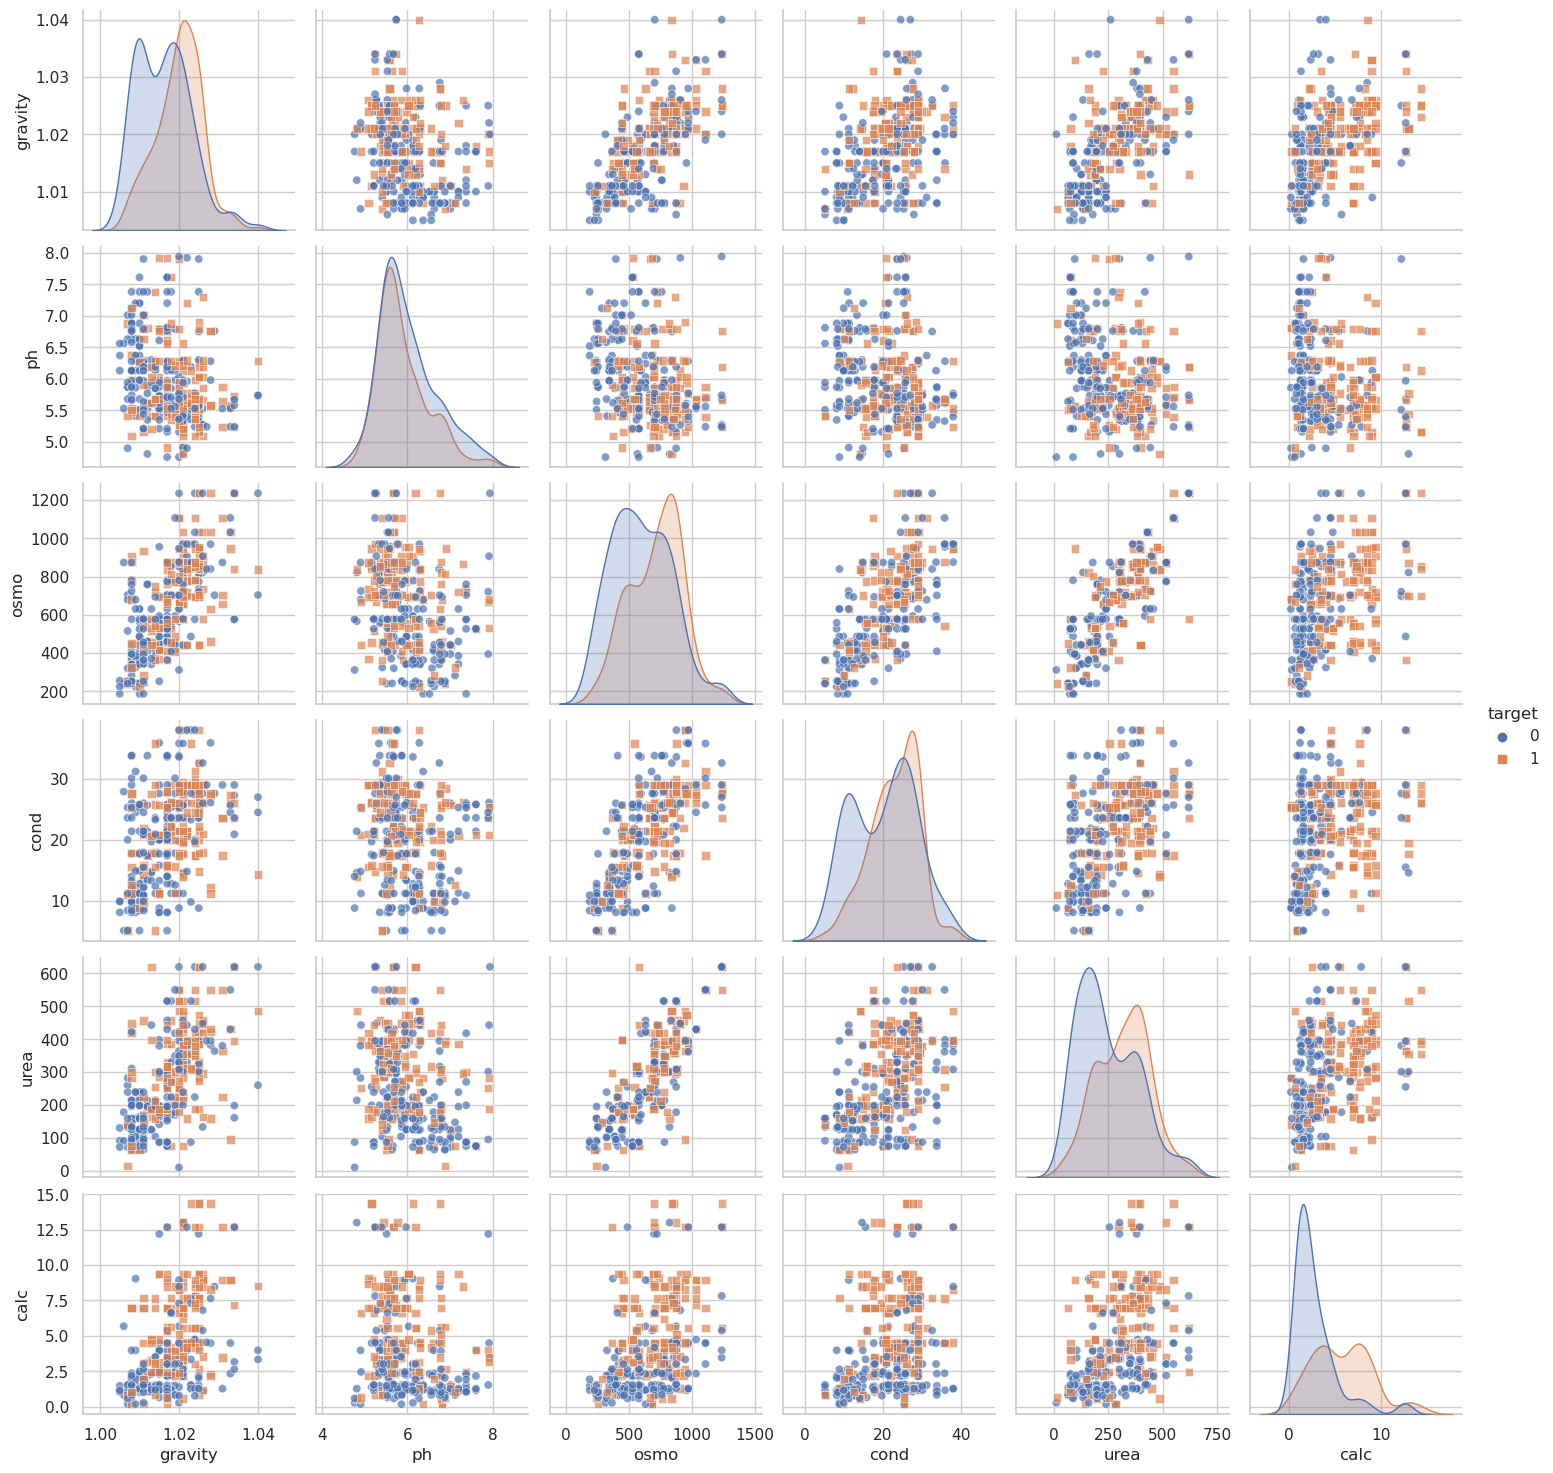

In [ ]:
# Scatterplot matrix
sns.set(style='whitegrid')
sns.pairplot(df, hue='target', diag_kind='kde', markers=['o', 's'], plot_kws={'alpha': 0.7})
plt.show()

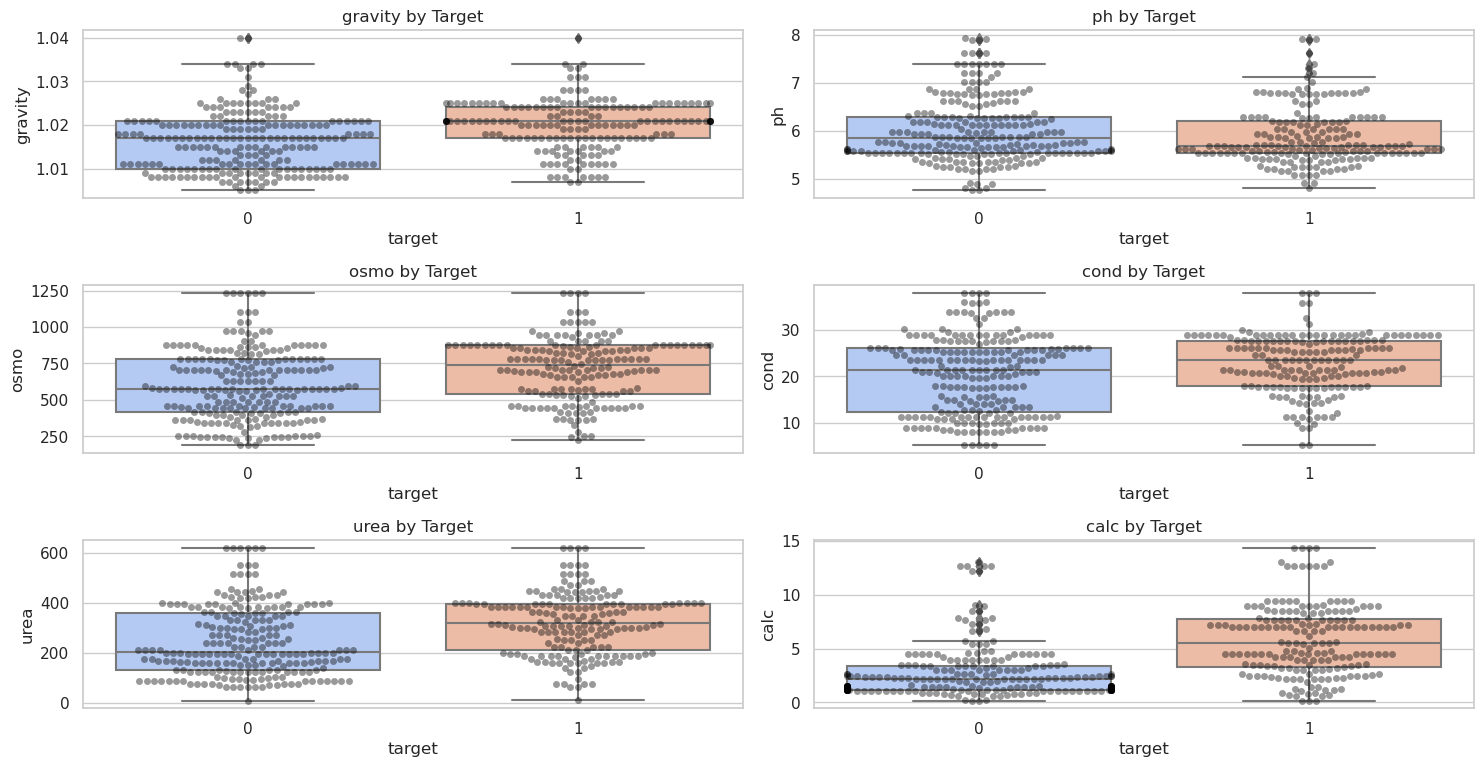

In [ ]:
# Box plots and swarm plots
plt.figure(figsize=(15, 15))
for i, column in enumerate(data_without_target.columns):
    plt.subplot(len(data_without_target.columns), 2, i + 1)
    sns.boxplot(x='target', y=column, data=df, palette='coolwarm')
    sns.swarmplot(x='target', y=column, data=df, color='black', alpha=0.4)
    plt.title(f'{column} by Target')
plt.tight_layout()
plt.show()

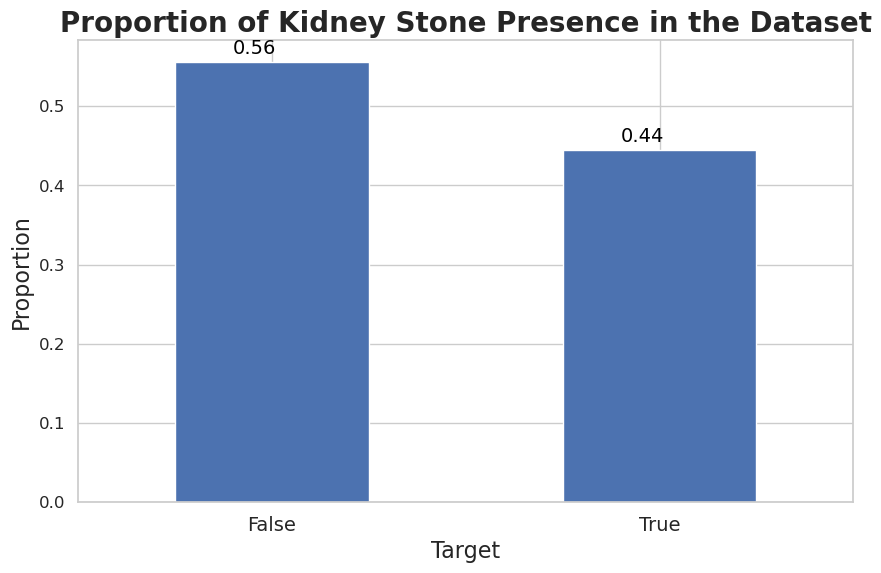

In [ ]:

target_counts = df['target'].value_counts(normalize=True)

ax = target_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

ax.set_xlabel('Target', fontsize=16)
ax.set_ylabel('Proportion', fontsize=16)
ax.set_title('Proportion of Kidney Stone Presence in the Dataset', fontsize=20, fontweight='bold')
plt.xticks(ticks=[0, 1], labels=['False', 'True'], rotation=0, fontsize=14)
plt.yticks(fontsize=12)

for i, v in enumerate(target_counts):
    ax.text(i - 0.1, v + 0.01, f'{v:.2f}', fontsize=14, color='black')

plt.show()

The dataset exhibits a slight class imbalance, with the majority class ('False') accounting for 56% and the minority class ('True') accounting for 44% of the total instances. While this is not a severe imbalance, it can still introduce bias in the model and impact its performance. To mitigate this issue, we can use the Synthetic Minority Over-sampling Technique (SMOTE) to generate synthetic samples for the minority class. By doing this, we can balance the class distribution and potentially improve the model's ability to generalize and make accurate predictions for both classes.

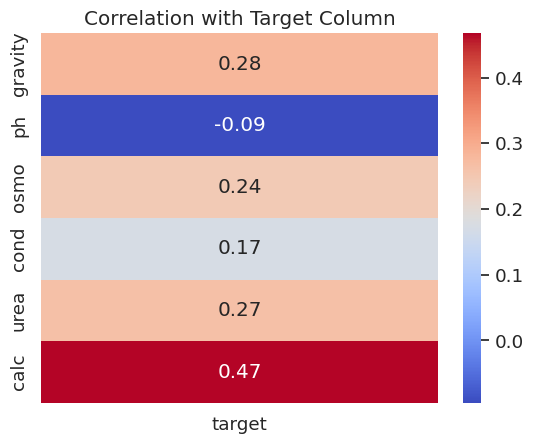

In [ ]:
# compute the correlation matrix with the target column
corr = df.corr()

# extract the correlations with the target column
target_corr = corr['target'].drop('target')

# create a heatmap of the correlations with the target column
sns.set(font_scale=1.2)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Target Column')
plt.show()

# <span style="color:#E888BB; font-size: 1%;">Feature Engineering</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:left;display:fill;border-radius:10px;background-color:#F1C40F;overflow:hidden;background-image: url(https://images.pexels.com/photos/3850689/pexels-photo-3850689.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>Feature Engineering </span></b> </div>



1. `Specific gravity` to `calcium` ratio: 

    This feature can help understand how concentrated the `calcium` content is in the `urine`, which can potentially affect stone formation.
    
    **formula : specific_gravity_calcium_ratio = specific_gravity x calcium_concentration**
  
2. `Calcium` to `conductivity` product:

    This feature can help determine the proportion of `calcium` ions relative to the total ion content, which might impact stone formation risk.

   **formula : calcium_conductivity_product = calcium_concentration * conductivity**
   
3. ` Calcium` and `pH` product:

    As the solubility of different types of kidney stones can be affected by `pH`, creating a product term between `calcium concentration` and `pH` could   provide insight into the combined impact of these factors on kidney stone formation.

    **formula : calcium_pH_product = calcium_concentration * pH**
    
4. ` Urea` and `pH` product:

    A high protein diet can increase the risk of kidney stone formation. Since urea is a waste product of protein metabolism, creating a product term between `urea concentration` and `pH` could help capture the combined effect of diet and urine acidity on stone formation risk.

    **formula : urea_pH_product = urea_concentration * pH**
    
5. `Osmolarity` and `calcium` product:

    A high osmolarity indicates concentrated urine, which could contribute to the formation of kidney stones. Creating a product term between `osmolarity` and `calcium concentration` might help capture the combined effect of urine concentration and calcium levels on stone formation risk.

    **formula : osmolarity_calcium_product = osmolarity * calcium_concentration**

6. Estimated urine volume:

    This feature estimates the urine volume based on `specific gravity` and `osmolarity`, which can provide insight into the concentration of solutes in the urine and their potential to form kidney stones.

    **formula: urine_volume = (1000 * specific_gravity * osmolarity) / (18 * 1.001)**

In [ ]:
# Calculate estimated urine volume
df['urine_volume'] = (1000 * df['gravity'] * df['osmo']) / (18 * 1.001)
# Specific gravity to calcium ratio
df['specific_gravity_calcium_ratio'] = df['gravity'] / df['calc']
# Calcium to conductivity product
df['calcium_conductivity_ratio'] = df['calc'] / df['cond']
# Calcium and pH product
df['calcium_pH_interaction'] = df['calc'] * df['ph']
# Urea and pH product
df['urea_pH_interaction'] = df['urea'] * df['ph']
# Osmolarity and calcium product
df['osmolarity_calcium_interaction'] = df['osmo'] * df['calc']

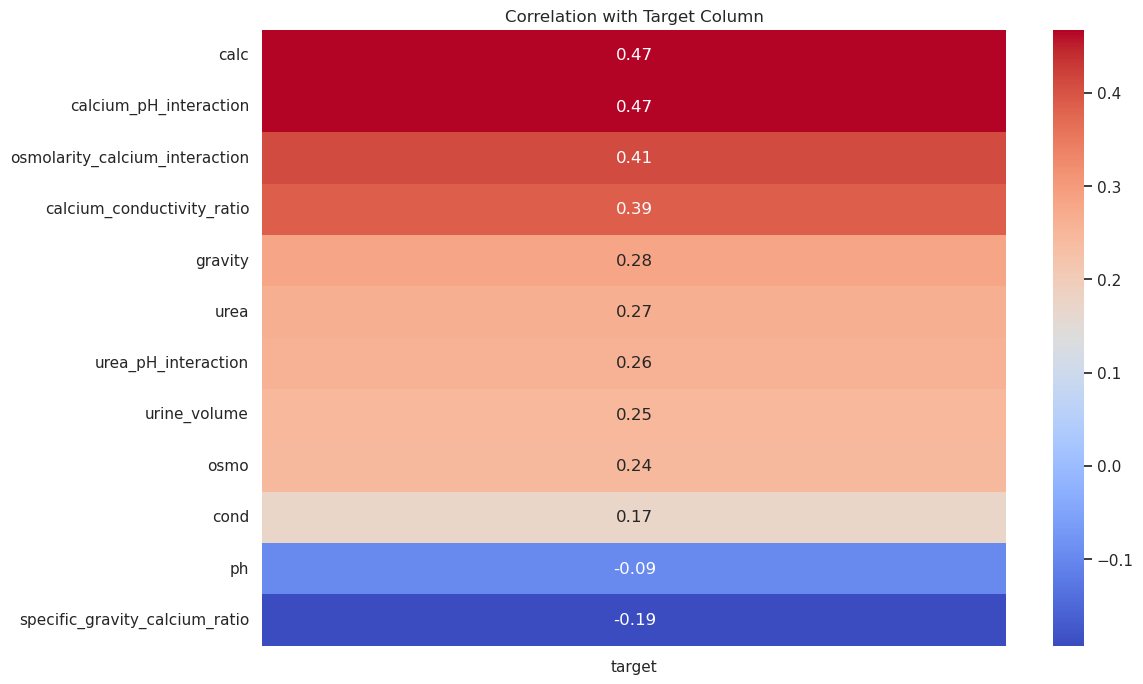

In [ ]:
# correlation matrix
corr = df.corr()
target_corr = corr['target'].drop('target').sort_values(ascending=False)
plt.figure(figsize=(12,8))
sns.set(font_scale=1)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Target Column')
plt.show()

In [ ]:
#Finding important feature

# Target variable
X = df.drop('target', axis=1)  
y = df['target']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

#show accuracy
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))

#check feature importance
feature_importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(feature_importance_df)

Accuracy: 0.6987951807228916
Classification Report:               precision    recall  f1-score   support

           0       0.70      0.78      0.74        45
           1       0.70      0.61      0.65        38

    accuracy                           0.70        83
   macro avg       0.70      0.69      0.69        83
weighted avg       0.70      0.70      0.70        83

Confusion Matrix: [[35 10]
 [15 23]]
                           Feature  Importance
9           calcium_pH_interaction    0.157963
7   specific_gravity_calcium_ratio    0.122901
11  osmolarity_calcium_interaction    0.107651
8       calcium_conductivity_ratio    0.097782
5                             calc    0.084923
1                               ph    0.073905
6                     urine_volume    0.073000
10             urea_pH_interaction    0.070232
3                             cond    0.060729
2                             osmo    0.054219
4                             urea    0.050516
0                   

**Conclusion**

With RandomForestClassifier, we obtained 70% accuracy and look at the classification (precision, f1-score) we know that this accuracy is not bias on unbalanced dataset. Now we will see top 5 features have the most impacts to our classification model.

In [ ]:
num_features = 5  # Choose an appropriate number based on your experimentation
selected_features = feature_importance_df.nlargest(num_features, 'Importance')['Feature'].values

# Create a new DataFrame with only the feature you have selected
X_top = X[selected_features]
print(selected_features)

['calcium_pH_interaction' 'specific_gravity_calcium_ratio'
 'osmolarity_calcium_interaction' 'calcium_conductivity_ratio' 'calc']
